## Import Libraries

In [41]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Wine Dataset - MLP Classifier

In this project, I use the Wine dataset from scikit-learn to build a classification model using a Multilayer Perceptron (MLP). The goal is to classify wines into three different classes based on chemical properties.

I preprocess the data, tune the model using GridSearchCV, and evaluate performance using accuracy, classification metrics, and a confusion matrix.


## Data Loading and Preprocessing

- Loaded the Wine dataset using `sklearn.datasets.load_wine()`.
- Split the data into training and test sets using `train_test_split`.
- Applied `StandardScaler` to scale the features.

## Load Dataset

In [5]:
wine = load_wine()
X = wine.data        
y = wine.target  

In [7]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [9]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Check for imbalance in target variable

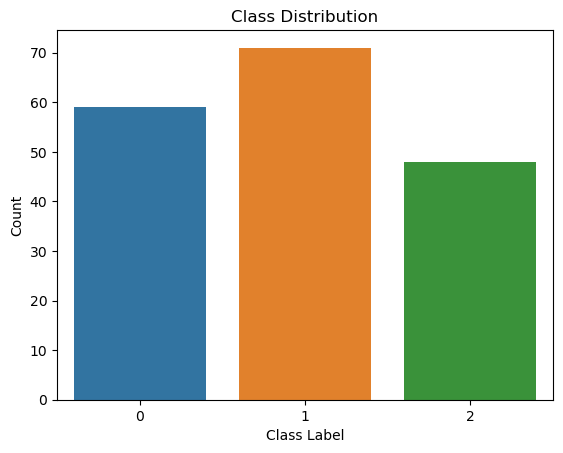

In [20]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

## Check relevant features

In [22]:
X_df = pd.DataFrame(X, columns=wine.feature_names)
X_df['target'] = y
correlations = X_df.corr(method='pearson')['target'].drop('target')
print(correlations)

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
Name: target, dtype: float64


## Split data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(len(X_train))
print(len(X_test))

142
36


## Scale the Features

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

### Model: MLPClassifier

The MLPClassifier is a feedforward neural network in scikit-learn. 

I performed a grid search over the following hyperparameters:
- Hidden layer sizes: (50,), (100,), (100, 50)
- Activation functions: ReLU, tanh
- Solvers: adam, sgd
- Regularization parameter (alpha): 0.0001, 0.001
- Learning rate: constant, adaptive

The best model was selected based on cross-validated accuracy using 5-fold cross-validation.


In [31]:
mlp = MLPClassifier(max_iter=1000, random_state=42)

## Hyperparameter Tuning

In [33]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:\n", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


## Model Evaluation

The performance of the best model was evaluated using:
- **Accuracy**
- **Classification Report**
- **Confusion Matrix**

These metrics provide a good view of how well the model performs, especially in multiclass classification tasks.

In [44]:
y_train_pred = best_model.predict(X_train_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

Train Accuracy: 1.0000


In [45]:
y_pred = best_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9722


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## Visualisations

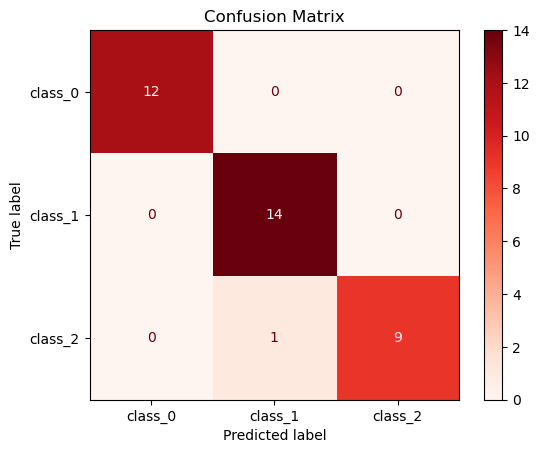

In [46]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

# Summary

- The MLPClassifier achieved an accuracy of 0.97 on the test set.
- All classes were reasonably well classified, as seen in the classification report and confusion matrix.